In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [117]:
df = pd.read_excel(r'AC Review demos.xlsx')
join_data = pd.read_excel(r'ac review totals.xlsx')
applicants = pd.read_excel(r'ACCO Applicants.xlsx')
tx_pop = pd.read_csv(r'texas_pop_2019_race_gender.csv')

In [118]:
tx_pop[['Race', 'Gender']] = tx_pop.Year.str.split(' ', 1, expand = True)

In [119]:
tx_pop.drop([0,1,2,3,4,5,8,11,14,17], inplace = True)

In [120]:
tx_pop.drop('Year', axis = 1, inplace = True)

In [121]:
tx_pop.rename(columns = {"2019": "pop"}, inplace = True)

In [122]:
tx_pop.replace(',','', regex=True, inplace=True)
tx_pop['pop'] = tx_pop['pop'].apply(pd.to_numeric,errors='coerce')

In [123]:
race_pop= tx_pop.groupby('Race').sum('pop')
race_pop['percent'] = ((race_pop['pop'] / race_pop['pop'].sum()) * 100).round(1)
race_pop

,pop,percent
Race,,
Asian,1429669,4.9
Black,3439413,11.9
Hispanic,11446898,39.5
Other,651510,2.2
White,12034112,41.5


In [124]:
gen_pop= tx_pop.groupby('Gender').sum('pop')
gen_pop['percent'] = ((gen_pop['pop'] / gen_pop['pop'].sum()) * 100).round(1)
gen_pop['upper_limit'] = gen_pop['percent']*1.1
gen_pop['lower_limit'] = gen_pop['percent']*.9
gen_pop

,pop,percent,upper_limit,lower_limit
Gender,,,,
Female,14596204,50.3,55.33,45.27
Male,14405398,49.7,54.67,44.73


In [125]:
df['review_id'] = df['name_abbrv'] + df['year'].astype('string')+ "_"+ df['month'].astype('string')

In [126]:
df = df[~df.status.str.contains('exoff')]
df=df[~(df['status'] == 'recommended')]


In [127]:
df.head()

,year,month,name_abbrv,Gender,Race/ Ethnicity,City,R/ U/ S,HHS Region,Eligible for 2nd Term?,Term Expiration,status,review_id
0,2021,1,ATW,F,White,Austin,U,7.0,Yes,2020-08-31 00:00:00,retained,ATW2021_1
1,2021,1,ATW,M,White,Amarillo,U,1.0,Yes,2021-08-31 00:00:00,retained,ATW2021_1
2,2021,1,ATW,M,Hispanic,Weslaco,R,11.0,Yes,2021-08-31 00:00:00,retained,ATW2021_1
3,2021,1,ATW,M,Asian/Pacific Islander,Sugarland,S,6.0,Yes,2021-08-31 00:00:00,retained,ATW2021_1
4,2021,1,ATW,F,Black,Houston,U,6.0,Yes,2021-08-31 00:00:00,retained,ATW2021_1


In [128]:
reviews = df['review_id'].unique()
reviews

<StringArray>
[    'ATW2021_1',     'ATW2020_4',      'BH2021_2',      'BH2020_9',
     'BEI2021_2',   'DRUB2019_12',    'DRUB2021_3',   'DRUB2020_10',
    'EHEA2020_4',    'EHEA2019_8',    'EHEA2021_2',  'HHSCEX2019_2',
   'HYPR2020_12',    'IDDS2019_8',    'IDDS2021_2',    'LTCF2020_9',
 'MEDCARE2018_5',   'MHSAD2019_7',   'NURPY2020_7',  'PALCAR2021_3',
    'PCCF2020_1',  'SNAPIS2020_4',  'STARK2019_12',   'STARK2021_1',
   'STARK2019_7', 'STARPLS2021_2',   'SMCAD2019_6',  'SMCAD2020_11',
  'SMCAD2020_10',   'SMCAD2019_9',    'TXBI2019_6',    'TXBI2020_5',
  'TXCON2019_11',   'TXHIV2019_7', 'TXMDIS2020_11',  'VPYQYI2020_2',
      'YC2020_2']
Length: 37, dtype: string

In [129]:
names = df.name_abbrv.unique().tolist()

In [130]:
print(df.name_abbrv.nunique())
df.sort_values('review_id', inplace = True)

24


In [131]:
df['Race/ Ethnicity'] = df['Race/ Ethnicity'].str.strip()


# Counts

In [132]:
pf = pd.crosstab(df['Race/ Ethnicity'], df['year'], margins = True, normalize = 'columns')\
.round(3)*100
pf.reset_index(inplace = True)
display(pf)

year,Race/ Ethnicity,2018,2019,2020,2021,All
0,American Indian/ Alaskan Native,0.0,0.5,0.9,0.7,0.7
1,Asian/Pacific Islander,11.1,4.9,6.1,6.6,5.9
2,Black,0.0,12.5,7.8,7.9,9.2
3,Hispanic,11.1,12.0,14.3,13.2,13.2
4,Other,0.0,1.1,1.3,0.0,0.9
5,White,77.8,69.0,69.6,71.5,70.0


In [133]:
pf = pd.crosstab(df['Gender'], df['year'], margins = True)
pf.reset_index(inplace = True)
display(pf)

pf = pd.crosstab(df['Gender'], df['year'], margins = True, normalize = 'columns')\
.round(3)*100
pf.reset_index(inplace = True)
display(pf)

year,Gender,2018,2019,2020,2021,All
0,F,5,110,125,98,338
1,M,5,78,105,54,242
2,All,10,188,230,152,580


year,Gender,2018,2019,2020,2021,All
0,F,50.0,58.5,54.3,64.5,58.3
1,M,50.0,41.5,45.7,35.5,41.7


In [134]:
pf = pd.crosstab(df['Gender'], df['year'], margins = True, normalize = 'columns')\
.round(3)*100
pf.reset_index(inplace = True)
display(pf)

year,Gender,2018,2019,2020,2021,All
0,F,50.0,58.5,54.3,64.5,58.3
1,M,50.0,41.5,45.7,35.5,41.7


In [135]:
# Counts
join_data.groupby('year')['year'].agg('count')

year
2018     1
2019    12
2020    16
2021    10
Name: year, dtype: int64

In [136]:
# Counts
jam = join_data.groupby('name_abbrv')['year'].agg('count')
print(jam)
jam = pd.DataFrame(jam)
jam.reset_index(inplace = True)
jam = jam[(jam.year >=0)]['name_abbrv']
jammed_names = jam.unique().tolist()

name_abbrv
ATW        2
BEI        1
BH         3
DRUB       3
EHEA       3
HHSCEX     1
HYPR       1
IDDS       2
LTCF       1
MEDCARE    1
MHSAD      1
NURPY      2
PALCAR     1
PCCF       1
SMCAD      4
SNAPIS     1
STARK      3
STARPLS    1
TXBI       2
TXCON      1
TXHIV      1
TXMDIS     1
VPYQYI     1
YC         1
Name: year, dtype: int64


<AxesSubplot:ylabel='Year'>

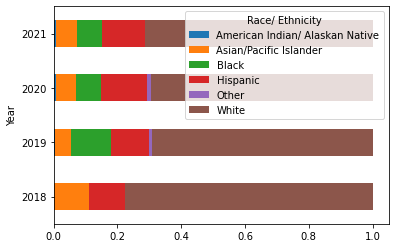

In [137]:
pd.crosstab(df.year, df['Race/ Ethnicity'],
            normalize='index').plot.barh( stacked=True, mark_right = True,
                                         ylabel = 'Percent Composition', xlabel = 'Year')

<Figure size 432x288 with 0 Axes>

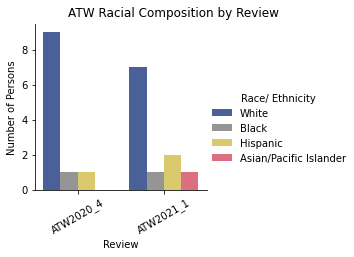

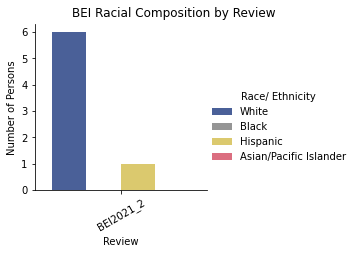

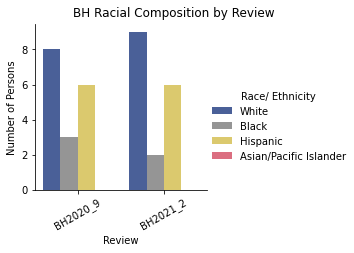

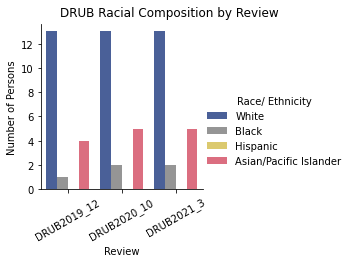

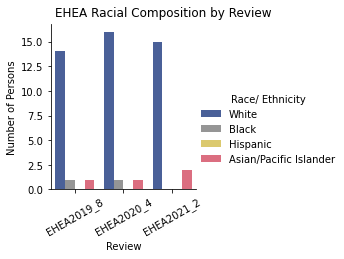

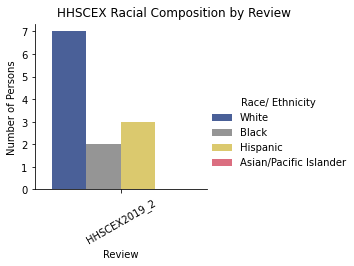

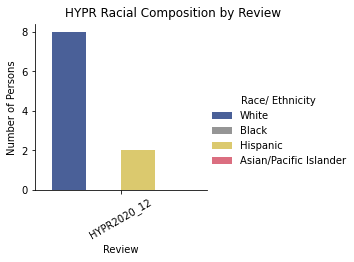

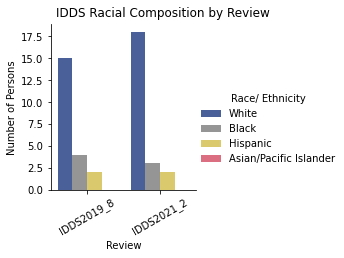

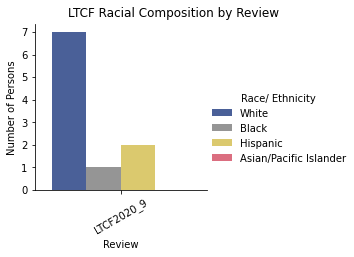

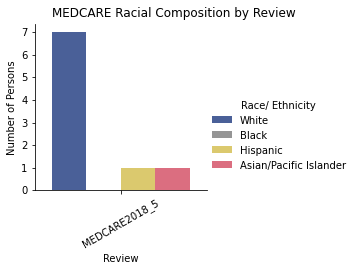

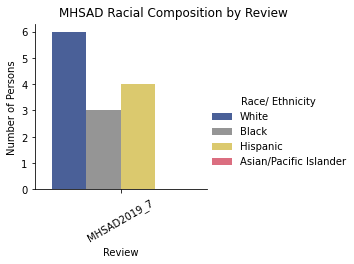

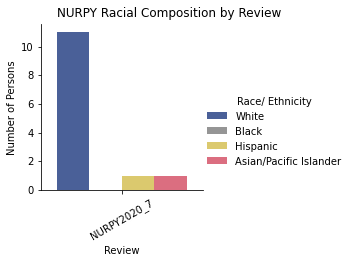

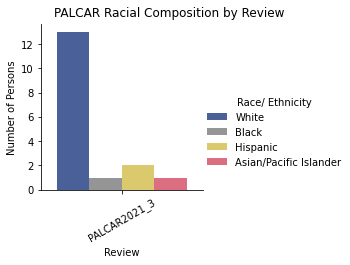

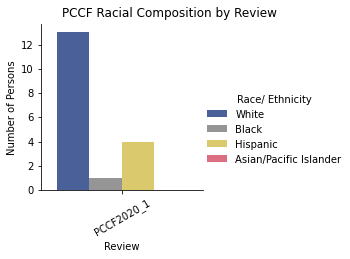

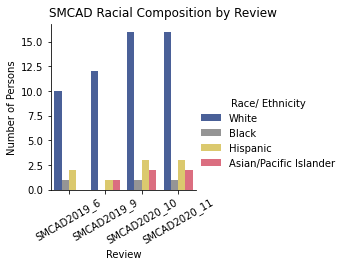

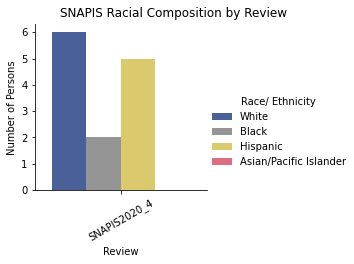

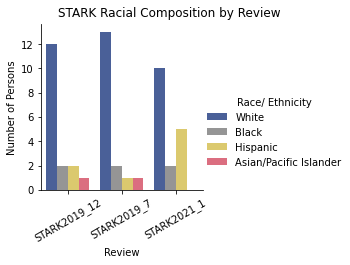

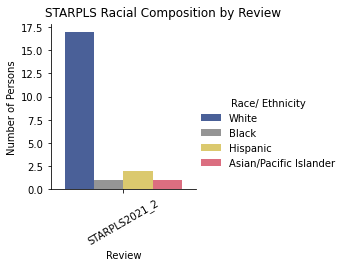

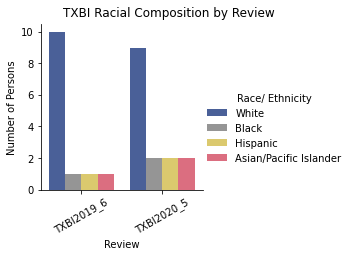

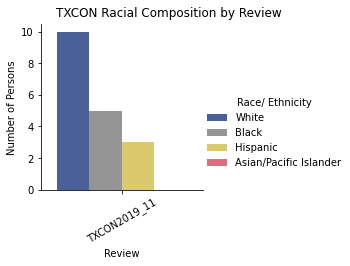

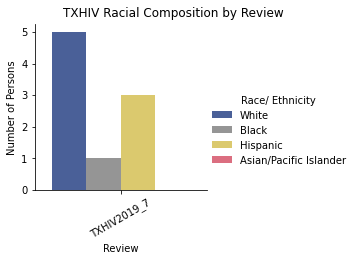

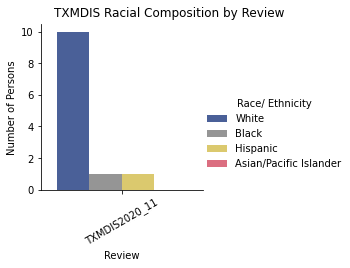

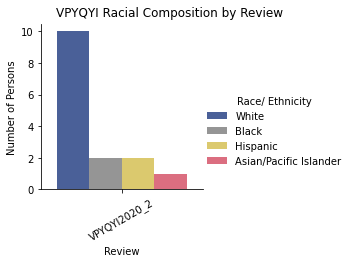

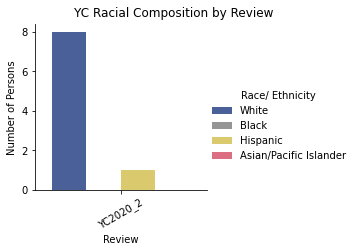

In [138]:
import seaborn as sns
%matplotlib inline
fig = plt.gcf()
# Change seaborn plot size


for name in jammed_names: 
    orders = ['White', 'Black', 'Hispanic', 'Asian/Pacific Islander']
    palette = {'White': '#3D5BA5', 'Black': '#959595', 'Hispanic': '#edd55c', 'Asian/Pacific Islander': '#ed5c74'}
    
    tf=df[~(df['status'] == 'recommended')]
    tf = tf[(df['name_abbrv'] == name)]
    cat = sns.catplot(x = 'review_id', data = tf, hue = 'Race/ Ethnicity', kind = 'count', aspect = 1, height = 3, hue_order=orders, palette=palette)
    cat.set_xticklabels(rotation=30)
    cat.set(xlabel='Review', ylabel='Number of Persons')
    cat.add_legend
    cat.set_titles("{col_name}")
    
    cat.fig.subplots_adjust(top=0.9) # adjust the Figure in rp
    cat.fig.suptitle(name + ' Racial Composition by Review')
    plt.show()
    cat.savefig(name + '_race.png', dpi=100, transparent = True, pad_inches = 0)

<Figure size 432x288 with 0 Axes>

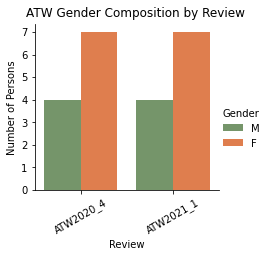

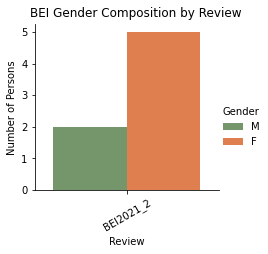

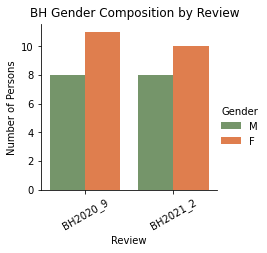

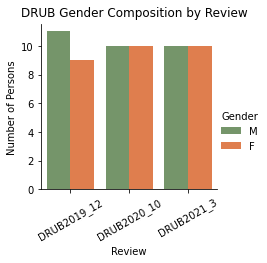

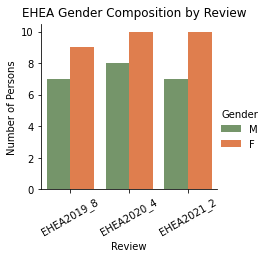

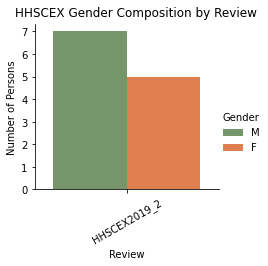

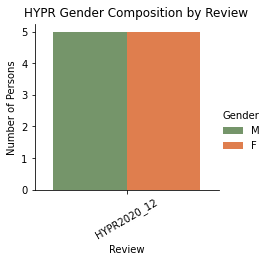

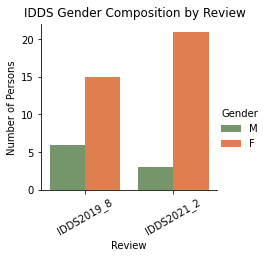

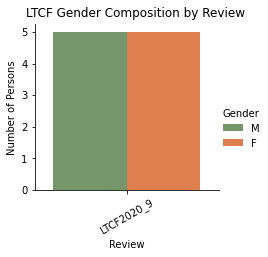

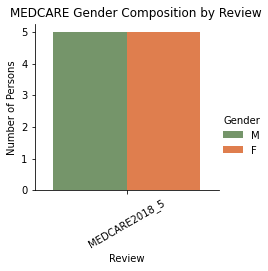

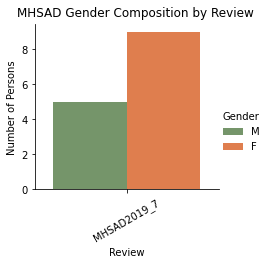

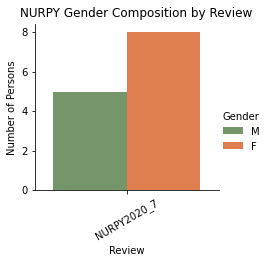

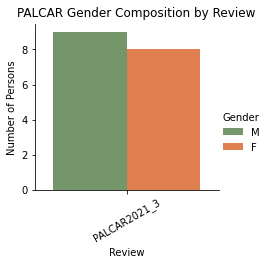

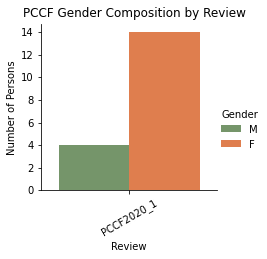

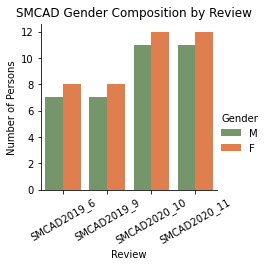

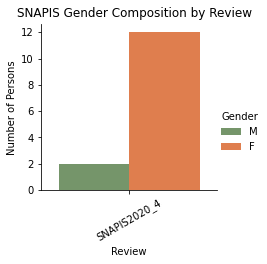

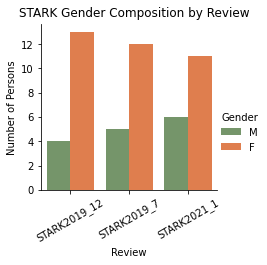

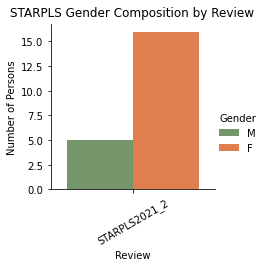

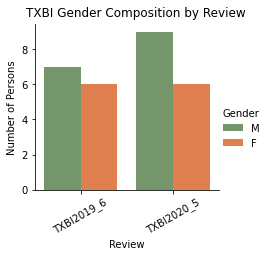

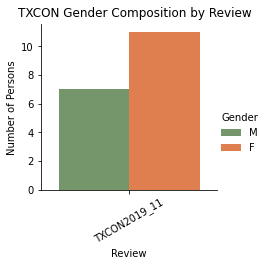

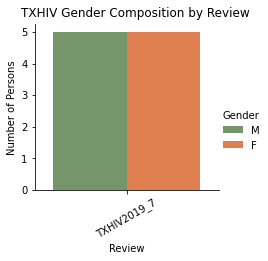

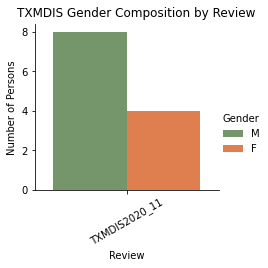

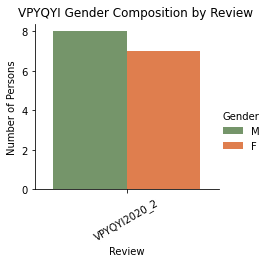

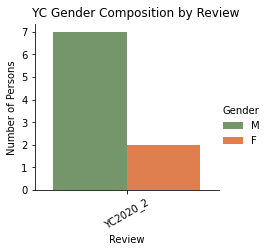

In [139]:
import seaborn as sns
%matplotlib inline
fig = plt.gcf()
# Change seaborn plot size


for name in jammed_names: 
    orders = ['M', 'F']
    palette = {'M': '#719C63', 'F': '#F77636', }
    
    tf=df[~(df['status'] == 'recommended')]
    tf = tf[(df['name_abbrv'] == name)]
    cat = sns.catplot(x = 'review_id', data = tf, hue = 'Gender', kind = 'count', aspect = 1, height = 3, hue_order=orders, palette=palette)
    cat.set_xticklabels(rotation=30)
    cat.set(xlabel='Review', ylabel='Number of Persons')
    cat.add_legend
    cat.set_titles("{col_name}")
    
    cat.fig.subplots_adjust(top=0.9) # adjust the Figure in rp
    cat.fig.suptitle(name + ' Gender Composition by Review')
    plt.show()
    cat.savefig(name + '_gender.png', dpi=100, transparent = True, pad_inches = 0)

In [140]:
df.head()

,year,month,name_abbrv,Gender,Race/ Ethnicity,City,R/ U/ S,HHS Region,Eligible for 2nd Term?,Term Expiration,status,review_id
19,2020,4,ATW,M,Hispanic,Weslaco,R,11.0,Yes,2021-08-31 00:00:00,retained,ATW2020_4
31,2020,4,ATW,M,White,Amarillo,U,1.0,Yes,2019-08-31 00:00:00,outgoing,ATW2020_4
30,2020,4,ATW,M,White,Austin,U,7.0,Yes,2019-08-31 00:00:00,outgoing,ATW2020_4
29,2020,4,ATW,F,White,Austin,U,7.0,NaN,2020-08-31 00:00:00,outgoing,ATW2020_4
25,2020,4,ATW,F,White,San Antonio,U,8.0,No,2020-08-31 00:00:00,retained,ATW2020_4


In [141]:
from pandas import ExcelWriter

for name in jammed_names : 
    tf = df[(df['name_abbrv'] == name)]
    cat = pd.crosstab(tf['review_id'], tf['Race/ Ethnicity'], margins = True, normalize = 'index')\
    .round(3)*100
    cat = cat.reset_index()
    cat.set_index('review_id', inplace = True)
    cat.index.name = name
    display(cat)


Race/ Ethnicity,Asian/Pacific Islander,Black,Hispanic,White
ATW,,,,
ATW2020_4,0.0,9.1,9.1,81.8
ATW2021_1,9.1,9.1,18.2,63.6
All,4.5,9.1,13.6,72.7


Race/ Ethnicity,Hispanic,White
BEI,,
BEI2021_2,14.3,85.7
All,14.3,85.7


Race/ Ethnicity,American Indian/ Alaskan Native,Black,Hispanic,White
BH,,,,
BH2020_9,10.5,15.8,31.6,42.1
BH2021_2,5.6,11.1,33.3,50.0
All,8.1,13.5,32.4,45.9


Race/ Ethnicity,Asian/Pacific Islander,Black,White
DRUB,,,
DRUB2019_12,22.2,5.6,72.2
DRUB2020_10,25.0,10.0,65.0
DRUB2021_3,25.0,10.0,65.0
All,24.1,8.6,67.2


Race/ Ethnicity,Asian/Pacific Islander,Black,White
EHEA,,,
EHEA2019_8,6.2,6.2,87.5
EHEA2020_4,5.6,5.6,88.9
EHEA2021_2,11.8,0.0,88.2
All,7.8,3.9,88.2


Race/ Ethnicity,Black,Hispanic,White
HHSCEX,,,
HHSCEX2019_2,16.7,25.0,58.3
All,16.7,25.0,58.3


Race/ Ethnicity,Hispanic,White
HYPR,,
HYPR2020_12,20.0,80.0
All,20.0,80.0


Race/ Ethnicity,Black,Hispanic,White
IDDS,,,
IDDS2019_8,19.0,9.5,71.4
IDDS2021_2,13.0,8.7,78.3
All,15.9,9.1,75.0


Race/ Ethnicity,Black,Hispanic,White
LTCF,,,
LTCF2020_9,10.0,20.0,70.0
All,10.0,20.0,70.0


Race/ Ethnicity,Asian/Pacific Islander,Hispanic,White
MEDCARE,,,
MEDCARE2018_5,11.1,11.1,77.8
All,11.1,11.1,77.8


Race/ Ethnicity,American Indian/ Alaskan Native,Black,Hispanic,White
MHSAD,,,,
MHSAD2019_7,7.1,21.4,28.6,42.9
All,7.1,21.4,28.6,42.9


Race/ Ethnicity,Asian/Pacific Islander,Hispanic,White
NURPY,,,
NURPY2020_7,7.7,7.7,84.6
All,7.7,7.7,84.6


Race/ Ethnicity,Asian/Pacific Islander,Black,Hispanic,White
PALCAR,,,,
PALCAR2021_3,5.9,5.9,11.8,76.5
All,5.9,5.9,11.8,76.5


Race/ Ethnicity,Black,Hispanic,White
PCCF,,,
PCCF2020_1,5.6,22.2,72.2
All,5.6,22.2,72.2


Race/ Ethnicity,Asian/Pacific Islander,Black,Hispanic,Other,White
SMCAD,,,,,
SMCAD2019_6,0.0,7.1,14.3,7.1,71.4
SMCAD2019_9,6.7,0.0,6.7,6.7,80.0
SMCAD2020_10,8.7,4.3,13.0,4.3,69.6
SMCAD2020_11,8.7,4.3,13.0,4.3,69.6
All,6.7,4.0,12.0,5.3,72.0


Race/ Ethnicity,Black,Hispanic,Other,White
SNAPIS,,,,
SNAPIS2020_4,14.3,35.7,7.1,42.9
All,14.3,35.7,7.1,42.9


Race/ Ethnicity,Asian/Pacific Islander,Black,Hispanic,White
STARK,,,,
STARK2019_12,5.9,11.8,11.8,70.6
STARK2019_7,5.9,11.8,5.9,76.5
STARK2021_1,0.0,11.8,29.4,58.8
All,3.9,11.8,15.7,68.6


Race/ Ethnicity,Asian/Pacific Islander,Black,Hispanic,White
STARPLS,,,,
STARPLS2021_2,4.8,4.8,9.5,81.0
All,4.8,4.8,9.5,81.0


Race/ Ethnicity,Asian/Pacific Islander,Black,Hispanic,White
TXBI,,,,
TXBI2019_6,7.7,7.7,7.7,76.9
TXBI2020_5,13.3,13.3,13.3,60.0
All,10.7,10.7,10.7,67.9


Race/ Ethnicity,Black,Hispanic,White
TXCON,,,
TXCON2019_11,27.8,16.7,55.6
All,27.8,16.7,55.6


Race/ Ethnicity,Black,Hispanic,White
TXHIV,,,
TXHIV2019_7,11.1,33.3,55.6
All,11.1,33.3,55.6


Race/ Ethnicity,Black,Hispanic,White
TXMDIS,,,
TXMDIS2020_11,8.3,8.3,83.3
All,8.3,8.3,83.3


Race/ Ethnicity,Asian/Pacific Islander,Black,Hispanic,White
VPYQYI,,,,
VPYQYI2020_2,6.7,13.3,13.3,66.7
All,6.7,13.3,13.3,66.7


Race/ Ethnicity,Hispanic,White
YC,,
YC2020_2,11.1,88.9
All,11.1,88.9


In [142]:
for name in jammed_names : 
    tf = df[(df['name_abbrv'] == name)]
    cat = pd.crosstab(tf['review_id'], tf['Gender'], margins = True, normalize = 'index')\
    .round(3)*100
    cat = cat.reset_index()
    cat.set_index('review_id', inplace = True)
    cat.index.name = name
    display(cat)


Gender,F,M
ATW,,
ATW2020_4,63.6,36.4
ATW2021_1,63.6,36.4
All,63.6,36.4


Gender,F,M
BEI,,
BEI2021_2,71.4,28.6
All,71.4,28.6


Gender,F,M
BH,,
BH2020_9,57.9,42.1
BH2021_2,55.6,44.4
All,56.8,43.2


Gender,F,M
DRUB,,
DRUB2019_12,45.0,55.0
DRUB2020_10,50.0,50.0
DRUB2021_3,50.0,50.0
All,48.3,51.7


Gender,F,M
EHEA,,
EHEA2019_8,56.2,43.8
EHEA2020_4,55.6,44.4
EHEA2021_2,58.8,41.2
All,56.9,43.1


Gender,F,M
HHSCEX,,
HHSCEX2019_2,41.7,58.3
All,41.7,58.3


Gender,F,M
HYPR,,
HYPR2020_12,50.0,50.0
All,50.0,50.0


Gender,F,M
IDDS,,
IDDS2019_8,71.4,28.6
IDDS2021_2,87.5,12.5
All,80.0,20.0


Gender,F,M
LTCF,,
LTCF2020_9,50.0,50.0
All,50.0,50.0


Gender,F,M
MEDCARE,,
MEDCARE2018_5,50.0,50.0
All,50.0,50.0


Gender,F,M
MHSAD,,
MHSAD2019_7,64.3,35.7
All,64.3,35.7


Gender,F,M
NURPY,,
NURPY2020_7,61.5,38.5
All,61.5,38.5


Gender,F,M
PALCAR,,
PALCAR2021_3,47.1,52.9
All,47.1,52.9


Gender,F,M
PCCF,,
PCCF2020_1,77.8,22.2
All,77.8,22.2


Gender,F,M
SMCAD,,
SMCAD2019_6,53.3,46.7
SMCAD2019_9,53.3,46.7
SMCAD2020_10,52.2,47.8
SMCAD2020_11,52.2,47.8
All,52.6,47.4


Gender,F,M
SNAPIS,,
SNAPIS2020_4,85.7,14.3
All,85.7,14.3


Gender,F,M
STARK,,
STARK2019_12,76.5,23.5
STARK2019_7,70.6,29.4
STARK2021_1,64.7,35.3
All,70.6,29.4


Gender,F,M
STARPLS,,
STARPLS2021_2,76.2,23.8
All,76.2,23.8


Gender,F,M
TXBI,,
TXBI2019_6,46.2,53.8
TXBI2020_5,40.0,60.0
All,42.9,57.1


Gender,F,M
TXCON,,
TXCON2019_11,61.1,38.9
All,61.1,38.9


Gender,F,M
TXHIV,,
TXHIV2019_7,50.0,50.0
All,50.0,50.0


Gender,F,M
TXMDIS,,
TXMDIS2020_11,33.3,66.7
All,33.3,66.7


Gender,F,M
VPYQYI,,
VPYQYI2020_2,46.7,53.3
All,46.7,53.3


Gender,F,M
YC,,
YC2020_2,22.2,77.8
All,22.2,77.8


In [143]:
members.columns

Index(['year', 'month', 'name_abbrv', 'Gender', 'Race/ Ethnicity', 'City',
       'R/ U/ S', 'HHS Region', 'Eligible for 2nd Term?', 'Term Expiration ',
       'status', 'review_id'],
      dtype='object')

In [144]:
members=df[~(df['status'] == 'recommended')]
race_coms = pd.crosstab([members['name_abbrv'],members['year'], members['month']], members['Race/ Ethnicity'], margins = True, normalize = 'index')\
.round(3)*100
display(race_coms)
race_coms.to_csv("race_coms.csv")

Race/ Ethnicity        American Indian/ Alaskan Native  \
name_abbrv year month                                    
ATW        2020 4                                  0.0   
           2021 1                                  0.0   
BEI        2021 2                                  0.0   
BH         2020 9                                 10.5   
           2021 2                                  5.6   
DRUB       2019 12                                 0.0   
           2020 10                                 0.0   
           2021 3                                  0.0   
EHEA       2019 8                                  0.0   
           2020 4                                  0.0   
           2021 2                                  0.0   
HHSCEX     2019 2                                  0.0   
HYPR       2020 12                                 0.0   
IDDS       2019 8                                  0.0   
           2021 2                                  0.0   
LTCF       2020 9                                  0.0   
MEDCARE    2018 5                                  0.0   
MHSAD      2019 7                                  7.1   
NURPY      2020 7                                  0.0   
PALCAR     2021 3                                  0.0   
PCCF       2020 1                                  0.0   
SMCAD      2019 6                                  0.0   
                9                                  0.0   
           2020 10                                 0.0   
                11                                 0.0   
SNAPIS     2020 4                                  0.0   
STARK      2019 7                                  0.0   
                12                                 0.0   
           2021 1                                  0.0   
STARPLS    2021 2                                  0.0   
TXBI       2019 6                                  0.0   
           2020 5                                  0.0   
TXCON      2019 11                                 0.0   
TXHIV      2019 7                                  0.0   
TXMDIS     2020 11                                 0.0   
VPYQYI     2020 2                                  0.0   
YC         2020 2                                  0.0   
All                                                0.7   

Race/ Ethnicity        Asian/Pacific Islander  Black  Hispanic  Other  White  
name_abbrv year month                                                         
ATW        2020 4                         0.0    9.1       9.1    0.0   81.8  
           2021 1                         9.1    9.1      18.2    0.0   63.6  
BEI        2021 2                         0.0    0.0      14.3    0.0   85.7  
BH         2020 9                         0.0   15.8      31.6    0.0   42.1  
           2021 2                         0.0   11.1      33.3    0.0   50.0  
DRUB       2019 12                       22.2    5.6       0.0    0.0   72.2  
           2020 10                       25.0   10.0       0.0    0.0   65.0  
           2021 3                        25.0   10.0       0.0    0.0   65.0  
EHEA       2019 8                         6.2    6.2       0.0    0.0   87.5  
           2020 4                         5.6    5.6       0.0    0.0   88.9  
           2021 2                        11.8    0.0       0.0    0.0   88.2  
HHSCEX     2019 2                         0.0   16.7      25.0    0.0   58.3  
HYPR       2020 12                        0.0    0.0      20.0    0.0   80.0  
IDDS       2019 8                         0.0   19.0       9.5    0.0   71.4  
           2021 2                         0.0   13.0       8.7    0.0   78.3  
LTCF       2020 9                         0.0   10.0      20.0    0.0   70.0  
MEDCARE    2018 5                        11.1    0.0      11.1    0.0   77.8  
MHSAD      2019 7                         0.0   21.4      28.6    0.0   42.9  
NURPY      2020 7                         7.7    0.0       7.7    0.0   84.6  
PALCAR     2021 3   

In [145]:
tf=df[~(df['status'] == 'recommended')]
gender_coms = pd.crosstab([tf['name_abbrv'],tf['year'], tf['month']], tf['Gender'], margins = True, normalize = 'index')\
.round(3)*100

display(gender_coms)
gender_coms.to_csv("gender_coms.csv")

Gender                    F     M
name_abbrv year month            
ATW        2020 4      63.6  36.4
           2021 1      63.6  36.4
BEI        2021 2      71.4  28.6
BH         2020 9      57.9  42.1
           2021 2      55.6  44.4
DRUB       2019 12     45.0  55.0
           2020 10     50.0  50.0
           2021 3      50.0  50.0
EHEA       2019 8      56.2  43.8
           2020 4      55.6  44.4
           2021 2      58.8  41.2
HHSCEX     2019 2      41.7  58.3
HYPR       2020 12     50.0  50.0
IDDS       2019 8      71.4  28.6
           2021 2      87.5  12.5
LTCF       2020 9      50.0  50.0
MEDCARE    2018 5      50.0  50.0
MHSAD      2019 7      64.3  35.7
NURPY      2020 7      61.5  38.5
PALCAR     2021 3      47.1  52.9
PCCF       2020 1      77.8  22.2
SMCAD      2019 6      53.3  46.7
                9      53.3  46.7
           2020 10     52.2  47.8
                11     52.2  47.8
SNAPIS     2020 4      85.7  14.3
STARK      2019 7      70.6  29.4
                12     76.5  23.5
           2021 1      64.7  35.3
STARPLS    2021 2      76.2  23.8
TXBI       2019 6      46.2  53.8
           2020 5      40.0  60.0
TXCON      2019 11     61.1  38.9
TXHIV      2019 7      50.0  50.0
TXMDIS     2020 11     33.3  66.7
VPYQYI     2020 2      46.7  53.3
YC         2020 2      22.2  77.8
All                    58.3  41.7

In [146]:
applicants = pd.read_excel(r'C:\Users\JFaulk01\ACCO Summary Spreadsheets\acco applicants.xlsx')
applicants['Race/ Ethnicity'] = applicants['Race/ Ethnicity'].str.strip()
applicants['Gender'] = applicants['Gender'].str.strip()

In [147]:
applicants['name_abbrv'] = applicants['review_id'].replace('(\d*\_*\d*)', '', regex=True)
applicants['year'] = applicants['review_id'].str.extract(r'(\d{4})', expand = False)
applicants['month'] = applicants['review_id'].str.extract(r'(\_\d{1,2})', expand = False).replace('(\_)', '', regex=True)
applicant_list = applicants['name_abbrv'].unique().tolist()
applicant_list

['ATW',
 'BH',
 'DRUB',
 'EHEA',
 'IDDS',
 'STARK',
 'SMCAD',
 'TXBI',
 'BEI',
 'HHSCEX',
 'HYPR',
 'LTCF',
 'MEDCARE',
 'MHSAD',
 'NURPY',
 'PALCAR',
 'PCCF',
 'STARPLS',
 'TXCON',
 'TXHIV',
 'TXMDIS',
 'VPYQYI',
 'YC']

In [150]:
race_apps = pd.crosstab([applicants['name_abbrv'],applicants['year'],applicants['month'], applicants['review_id']], applicants['Race/ Ethnicity'], margins = True, normalize = 'index')\
.round(3)*100

for name in jammed_names : 
    tf = applicants[(applicants['name_abbrv'] == name)]
    if tf.name_abbrv.count() == 0:
        continue
    cat = pd.crosstab(tf['review_id'], tf['Race/ Ethnicity'], margins = True, normalize = 'index')\
    .round(3)*100
    cat = cat.reset_index()
    cat.set_index('review_id', inplace = True)
    cat.index.name = name
    display(cat)

Race/ Ethnicity,American Indian/ Alaskan Native,Asian/Pacific Islander,Black,Hispanic,White
ATW,,,,,
ATW2020_4,2.8,8.3,13.9,11.1,63.9
ATW2021_1,2.1,8.5,12.8,4.3,72.3
All,2.4,8.4,13.3,7.2,68.7


Race/ Ethnicity,Black,Hispanic,Other,White
BEI,,,,
BEI2021_2,7.7,7.7,7.7,76.9
All,7.7,7.7,7.7,76.9


Race/ Ethnicity,American Indian/ Alaskan Native,Asian/Pacific Islander,Black,Hispanic,Other,White
BH,,,,,,
BH2020_9,0.0,9.4,28.1,15.6,3.1,43.8
BH2021_2,1.1,3.2,24.7,18.8,2.2,50.0
All,0.9,4.1,25.2,18.3,2.3,49.1


Race/ Ethnicity,Asian/Pacific Islander,Black,Hispanic,White
DRUB,,,,
DRUB2019_12,26.7,6.7,0.0,66.7
DRUB2020_10,0.0,12.5,12.5,75.0
DRUB2021_3,10.0,20.0,20.0,50.0
All,15.2,12.1,9.1,63.6


Race/ Ethnicity,Asian/Pacific Islander,Black,Hispanic,Other,White
EHEA,,,,,
EHEA2019_8,14.3,42.9,0.0,0.0,42.9
EHEA2020_4,16.7,11.1,5.6,0.0,66.7
EHEA2021_2,24.0,8.0,8.0,4.0,56.0
All,20.0,14.0,6.0,2.0,58.0


Race/ Ethnicity,Asian/Pacific Islander,Black,Hispanic,Other,White
HHSCEX,,,,,
HHSCEX2019_2,8.6,11.4,26.7,3.8,49.5
All,8.6,11.4,26.7,3.8,49.5


Race/ Ethnicity,Asian/Pacific Islander,Hispanic,White
HYPR,,,
HYPR2020_12,9.1,9.1,81.8
All,9.1,9.1,81.8


Race/ Ethnicity,Asian/Pacific Islander,Black,Hispanic,Other,White
IDDS,,,,,
IDDS2019_8,2.4,4.8,4.8,2.4,85.7
IDDS2021_2,0.0,7.7,23.1,10.3,59.0
All,1.2,6.2,13.6,6.2,72.8


Race/ Ethnicity,Black,Hispanic,White
LTCF,,,
LTCF2020_9,8.8,8.8,82.4
All,8.8,8.8,82.4


Race/ Ethnicity,Asian/Pacific Islander,Black,Hispanic,White
MEDCARE,,,,
MEDCARE2018_5,5.3,31.6,15.8,47.4
All,5.3,31.6,15.8,47.4


Race/ Ethnicity,Black,Hispanic,Other,White
MHSAD,,,,
MHSAD2019_7,19.0,14.3,4.8,61.9
All,19.0,14.3,4.8,61.9


Race/ Ethnicity,Asian/Pacific Islander,Hispanic,Other,White
NURPY,,,,
NURPY2020_7,6.5,6.5,3.2,83.9
All,6.5,6.5,3.2,83.9


Race/ Ethnicity,Asian/Pacific Islander,Black,Hispanic,Other,White
PALCAR,,,,,
PALCAR2021_3,10.5,15.8,13.2,2.6,57.9
All,10.5,15.8,13.2,2.6,57.9


Race/ Ethnicity,Asian/Pacific Islander,Black,Hispanic,Other,White
PCCF,,,,,
PCCF2020_1,2.9,21.4,14.3,4.3,57.1
All,2.9,21.4,14.3,4.3,57.1


Race/ Ethnicity,American Indian/ Alaskan Native,Asian/Pacific Islander,Black,Hispanic,Other,White
SMCAD,,,,,,
SMCAD2019_6,1.0,9.5,9.5,20.0,1.9,58.1
SMCAD2019_9,0.0,8.5,15.3,22.0,1.7,52.5
SMCAD2020_10,0.0,6.8,16.9,15.3,1.7,59.3
SMCAD2020_11,0.0,6.8,16.9,15.3,1.7,59.3
All,0.4,8.2,13.8,18.4,1.8,57.4


Race/ Ethnicity,American Indian/ Alaskan Native,Asian/Pacific Islander,Black,Hispanic,Other,White
STARK,,,,,,
STARK2019_12,1.4,1.4,16.7,15.3,0.0,65.3
STARK2019_7,1.4,1.4,16.9,15.5,0.0,64.8
STARK2021_1,0.0,0.0,20.0,20.0,6.0,54.0
All,1.0,1.0,17.6,16.6,1.6,62.2


Race/ Ethnicity,Black,Hispanic,Other,White
STARPLS,,,,
STARPLS2021_2,28.6,28.6,14.3,28.6
All,28.6,28.6,14.3,28.6


Race/ Ethnicity,Asian/Pacific Islander,Black,Hispanic,Other,White
TXBI,,,,,
TXBI2019_6,6.4,8.5,23.4,0.0,61.7
TXBI2020_5,0.0,5.3,15.8,5.3,73.7
All,3.5,7.1,20.0,2.4,67.1


Race/ Ethnicity,Black,Hispanic,Other,White
TXCON,,,,
TXCON2019_11,25.7,8.6,5.7,60.0
All,25.7,8.6,5.7,60.0


Race/ Ethnicity,Asian/Pacific Islander,Black,Hispanic,Other,White
TXHIV,,,,,
TXHIV2019_7,9.1,27.3,27.3,4.5,31.8
All,9.1,27.3,27.3,4.5,31.8


Race/ Ethnicity,Asian/Pacific Islander,Hispanic,White
TXMDIS,,,
TXMDIS2020_11,12.5,37.5,50.0
All,12.5,37.5,50.0


Race/ Ethnicity,American Indian/ Alaskan Native,Asian/Pacific Islander,Black,Hispanic,Other,White
VPYQYI,,,,,,
VPYQYI2020_2,1.7,12.1,12.1,17.2,1.7,55.2
All,1.7,12.1,12.1,17.2,1.7,55.2


Race/ Ethnicity,White
YC,
YC2020_2,100.0
All,100.0


In [151]:
race_table = pd.merge(race_apps, race_coms, on = 'name_abbrv', how = 'left', suffixes = ('_app', '_coms'))
race_table

Race/ Ethnicity,American Indian/ Alaskan Native_app,Asian/Pacific Islander_app,Black_app,Hispanic_app,Other_app,White_app,American Indian/ Alaskan Native_coms,Asian/Pacific Islander_coms,Black_coms,Hispanic_coms,Other_coms,White_coms
name_abbrv,,,,,,,,,,,,
ATW,2.8,8.3,13.9,11.1,0.0,63.9,0.0,0.0,9.1,9.1,0.0,81.8
ATW,2.8,8.3,13.9,11.1,0.0,63.9,0.0,9.1,9.1,18.2,0.0,63.6
ATW,2.1,8.5,12.8,4.3,0.0,72.3,0.0,0.0,9.1,9.1,0.0,81.8
ATW,2.1,8.5,12.8,4.3,0.0,72.3,0.0,9.1,9.1,18.2,0.0,63.6
BEI,0.0,0.0,7.7,7.7,7.7,76.9,0.0,0.0,0.0,14.3,0.0,85.7
...,...,...,...,...,...,...,...,...,...,...,...,...
TXHIV,0.0,9.1,27.3,27.3,4.5,31.8,0.0,0.0,11.1,33.3,0.0,55.6
TXMDIS,0.0,12.5,0.0,37.5,0.0,50.0,0.0,0.0,8.3,8.3,0.0,83.3
VPYQYI,1.7,12.1,12.1,17.2,1.7,55.2,0.0,6.7,13.3,13.3,0.0,66.7


In [152]:
race_apps['Other'] = race_apps['American Indian/ Alaskan Native'] + race_apps['Other']

In [153]:
race_pop = race_pop.transpose()
race_pop.drop(['pop'], inplace = True)

In [154]:
race_apps

Race/ Ethnicity                      American Indian/ Alaskan Native  \
name_abbrv year month review_id                                        
ATW        2020 4     ATW2020_4                                  2.8   
           2021 1     ATW2021_1                                  2.1   
BEI        2021 2     BEI2021_2                                  0.0   
BH         2020 9     BH2020_9                                   0.0   
           2021 2     BH2021_2                                   1.1   
DRUB       2019 12    DRUB2019_12                                0.0   
           2020 10    DRUB2020_10                                0.0   
           2021 3     DRUB2021_3                                 0.0   
EHEA       2019 8     EHEA2019_8                                 0.0   
           2020 4     EHEA2020_4                                 0.0   
           2021 2     EHEA2021_2                                 0.0   
HHSCEX     2019 2     HHSCEX2019_2                               0.0   
HYPR       2020 12    HYPR2020_12                                0.0   
IDDS       2019 8     IDDS2019_8                                 0.0   
           2021 2     IDDS2021_2                                 0.0   
LTCF       2020 9     LTCF2020_9                                 0.0   
MEDCARE    2018 5     MEDCARE2018_5                              0.0   
MHSAD      2019 7     MHSAD2019_7                                0.0   
NURPY      2020 7     NURPY2020_7                                0.0   
PALCAR     2021 3     PALCAR2021_3                               0.0   
PCCF       2020 1     PCCF2020_1                                 0.0   
SMCAD      2019 6     SMCAD2019_6                                1.0   
                9     SMCAD2019_9                                0.0   
           2020 10    SMCAD2020_10                               0.0   
                11    SMCAD2020_11                               0.0   
STARK      2019 12    STARK2019_12                               1.4   
                7     STARK2019_7                                1.4   
           2021 1     STARK2021_1                                0.0   
STARPLS    2021 2     STARPLS2021_2                              0.0   
TXBI       2019 6     TXBI2019_6                                 0.0   
           2020 5     TXBI2020_5                                 0.0   
TXCON      2019 11    TXCON2019_11                               0.0   
TXHIV      2019 7     TXHIV2019_7                                0.0   
TXMDIS     2020 11    TXMDIS2020_11                              0.0   
VPYQYI     2020 2     VPYQYI2020_2                               1.7   
YC         2020 2     YC2020_2                                   0.0   
All                                                              0.5   

Race/ Ethnicity                      Asian/Pacific Islander  Black  Hispanic  \
name_abbrv year month review_id                                                
ATW        2020 4     ATW2020_4                         8.3   13.9      11.1   
           2021 1     ATW2021_1                         8.5   12.8       4.3   
BEI        2021 2     BEI2021_2                         0.0    7.7       7.7   
BH         2020 9     BH2020_9                          9.4   28.1      15.6   
           2021 2     BH2021_2                          3.2   24.7      18.8   
DRUB       2019 12    DRUB2019_12                      26.7    6.7       0.0   
           2020 10    DRUB2020_10                       0.0   12.5      12.5   
           2021 3     DRUB2021_3                       10.0   20.0      20.0   
EHEA       2019 8     EHEA2019_8                       14.3   42.9       0.0   
           2020 4     EHEA2020_4                       16.7   11.1       5.6   
           2021 2     EHEA2021_2                       24.0    8.0       8.0   
HHSCEX     2019 2     HHSCEX2019_2                      8.6   11.4      26.7   
HYPR       2020 12    HYPR2020_12                       9.1    0.0     

In [155]:
race_pop

Race,Asian,Black,Hispanic,Other,White
percent,4.9,11.9,39.5,2.2,41.5


In [156]:
race_apps['u_limit_w'] = 41.5*1.1
race_apps['l_limit_w'] = 41.5*.9
race_apps['u_limit_b'] = 11.9*1.1
race_apps['l_limit_b'] = 11.9*.9
race_apps['u_limit_h'] = 39.5*1.1
race_apps['l_limit_h'] = 39.5*.9
race_apps['u_limit_a'] = 4.9*1.1
race_apps['l_limit_a'] = 4.9*.9
race_apps['u_limit_o'] = 2.2*1.1
race_apps['l_limit_o'] = 2.2*.9

race_apps[['u_limit_w','u_limit_b','u_limit_h','u_limit_a','u_limit_o','l_limit_w','l_limit_b','l_limit_h','l_limit_a',]]


Race/ Ethnicity                      u_limit_w  u_limit_b  u_limit_h  \
name_abbrv year month review_id                                        
ATW        2020 4     ATW2020_4          45.65      13.09      43.45   
           2021 1     ATW2021_1          45.65      13.09      43.45   
BEI        2021 2     BEI2021_2          45.65      13.09      43.45   
BH         2020 9     BH2020_9           45.65      13.09      43.45   
           2021 2     BH2021_2           45.65      13.09      43.45   
DRUB       2019 12    DRUB2019_12        45.65      13.09      43.45   
           2020 10    DRUB2020_10        45.65      13.09      43.45   
           2021 3     DRUB2021_3         45.65      13.09      43.45   
EHEA       2019 8     EHEA2019_8         45.65      13.09      43.45   
           2020 4     EHEA2020_4         45.65      13.09      43.45   
           2021 2     EHEA2021_2         45.65      13.09      43.45   
HHSCEX     2019 2     HHSCEX2019_2       45.65      13.09      43.45   
HYPR       2020 12    HYPR2020_12        45.65      13.09      43.45   
IDDS       2019 8     IDDS2019_8         45.65      13.09      43.45   
           2021 2     IDDS2021_2         45.65      13.09      43.45   
LTCF       2020 9     LTCF2020_9         45.65      13.09      43.45   
MEDCARE    2018 5     MEDCARE2018_5      45.65      13.09      43.45   
MHSAD      2019 7     MHSAD2019_7        45.65      13.09      43.45   
NURPY      2020 7     NURPY2020_7        45.65      13.09      43.45   
PALCAR     2021 3     PALCAR2021_3       45.65      13.09      43.45   
PCCF       2020 1     PCCF2020_1         45.65      13.09      43.45   
SMCAD      2019 6     SMCAD2019_6        45.65      13.09      43.45   
                9     SMCAD2019_9        45.65      13.09      43.45   
           2020 10    SMCAD2020_10       45.65      13.09      43.45   
                11    SMCAD2020_11       45.65      13.09      43.45   
STARK      2019 12    STARK2019_12       45.65      13.09      43.45   
                7     STARK2019_7        45.65      13.09      43.45   
           2021 1     STARK2021_1        45.65      13.09      43.45   
STARPLS    2021 2     STARPLS2021_2      45.65      13.09      43.45   
TXBI       2019 6     TXBI2019_6         45.65      13.09      43.45   
           2020 5     TXBI2020_5         45.65      13.09      43.45   
TXCON      2019 11    TXCON2019_11       45.65      13.09      43.45   
TXHIV      2019 7     TXHIV2019_7        45.65      13.09      43.45   
TXMDIS     2020 11    TXMDIS2020_11      45.65      13.09      43.45   
VPYQYI     2020 2     VPYQYI2020_2       45.65      13.09      43.45   
YC         2020 2     YC2020_2           45.65      13.09      43.45   
All                                      45.65      13.09      43.45   

Race/ Ethnicity                      u_limit_a  u_limit_o  l_limit_w  \
name_abbrv year month review_id                                        
ATW        2020 4     ATW2020_4           5.39       2.42      37.35   
           2021 1     ATW2021_1           5.39       2.42      37.35   
BEI        2021 2     BEI2021_2           5.39       2.42      37.35   
BH         2020 9     BH2020_9            5.39       2.42      37.35   
           2021 2     BH2021_2            5.39       2.42      37.35   
DRUB       2019 12    DRUB2019_12         5.39       2.42      37.35   
           2020 10    DRUB2020_10         5.39       2.42      37.35   
           2021 3     DRUB2021_3          5.39       2.42      37.35   
EHEA       2019 8     EHEA2019_8          5.39       2.42      37.35   
           2020 4     EHEA2020_4          5.39       2.42      37.35   
           2021 2     EHEA2021_2          5.39       2.42      37.35   
HHSCEX     2019 2     HHSCEX2019_2        5.39       2.42      37.35   
HYPR       2020 12    HYPR2020_12         5.39       2.42      37.35   
IDDS       2019 8     IDDS2019_8          5.39       2.42      37.35   
           2021 2     IDDS2021_2       

In [157]:


w_condition = ((race_apps['White'] >= race_apps['l_limit_w']) & (race_apps['White'] <= race_apps['u_limit_w']))
b_condition = ((race_apps['Black'] >= race_apps['l_limit_b']) & (race_apps['Black'] <= race_apps['u_limit_b']))
h_condition = ((race_apps['Hispanic'] >= race_apps['l_limit_h']) & (race_apps['Hispanic'] <= race_apps['u_limit_h']))
a_condition = ((race_apps['Asian/Pacific Islander'] >= race_apps['l_limit_a']) & (race_apps['Asian/Pacific Islander'] <= race_apps['u_limit_a']))
o_condition = ((race_apps['Other'] >= race_apps['l_limit_o']) & (race_apps['Other'] <= race_apps['u_limit_o']))



race_apps['coms?'] = np.where(w_condition|b_condition|h_condition|a_condition|o_condition, 'True', 'False')  #create new column in df1 to check if prices match
out.to_excel("apps_vs_pops.xlsx")

In [158]:
gender_apps = pd.crosstab([applicants['name_abbrv'],applicants['year'],applicants['month'], applicants['review_id']], applicants['Gender'], margins = True, normalize = 'index')\
.round(3)*100
for name in jammed_names : 
    tf = applicants[(applicants['name_abbrv'] == name)]
    if tf.name_abbrv.count() == 0:
        continue
    cat = pd.crosstab(tf['review_id'], tf['Gender'], margins = True, normalize = 'index', dropna = False)\
    .round(3)*100
    cat = cat.reset_index()
    cat.set_index('review_id', inplace = True)
    cat.index.name = name
    display(cat)

Gender,F,M
ATW,,
ATW2020_4,66.7,33.3
ATW2021_1,80.9,19.1
All,74.7,25.3


Gender,F,M
BEI,,
BEI2021_2,61.5,38.5
All,61.5,38.5


Gender,F,M
BH,,
BH2020_9,75.0,25.0
BH2021_2,75.8,24.2
All,75.7,24.3


Gender,F,M
DRUB,,
DRUB2019_12,53.3,46.7
DRUB2020_10,62.5,37.5
DRUB2021_3,30.0,70.0
All,48.5,51.5


Gender,F,M
EHEA,,
EHEA2019_8,57.1,42.9
EHEA2020_4,66.7,33.3
EHEA2021_2,44.0,56.0
All,54.0,46.0


Gender,Did Not Disclose,F,M
HHSCEX,,,
HHSCEX2019_2,1.0,59.0,40.0
All,1.0,59.0,40.0


Gender,Did Not Disclose,M
HYPR,,
HYPR2020_12,18.2,81.8
All,18.2,81.8


Gender,F,M
IDDS,,
IDDS2019_8,83.3,16.7
IDDS2021_2,89.7,10.3
All,86.4,13.6


Gender,F,M
LTCF,,
LTCF2020_9,44.1,55.9
All,44.1,55.9


Gender,F,M
MEDCARE,,
MEDCARE2018_5,63.2,36.8
All,63.2,36.8


Gender,F,M
MHSAD,,
MHSAD2019_7,47.6,52.4
All,47.6,52.4


Gender,F,M
NURPY,,
NURPY2020_7,61.3,38.7
All,61.3,38.7


Gender,F,M
PALCAR,,
PALCAR2021_3,81.6,18.4
All,81.6,18.4


Gender,F,M
PCCF,,
PCCF2020_1,81.4,18.6
All,81.4,18.6


Gender,Did Not Disclose,F,M
SMCAD,,,
SMCAD2019_6,1.0,62.9,36.2
SMCAD2019_9,0.0,59.3,40.7
SMCAD2020_10,0.0,67.8,32.2
SMCAD2020_11,0.0,67.8,32.2
All,0.4,64.2,35.5


Gender,F,M
STARK,,
STARK2019_12,81.9,18.1
STARK2019_7,81.9,18.1
STARK2021_1,82.0,18.0
All,82.0,18.0


Gender,F
STARPLS,
STARPLS2021_2,100.0
All,100.0


Gender,F,M,Nonbinary
TXBI,,,
TXBI2019_6,72.3,25.5,2.1
TXBI2020_5,65.8,34.2,0.0
All,69.4,29.4,1.2


Gender,F,M
TXCON,,
TXCON2019_11,71.4,28.6
All,71.4,28.6


Gender,F,M
TXHIV,,
TXHIV2019_7,50.0,50.0
All,50.0,50.0


Gender,F,M
TXMDIS,,
TXMDIS2020_11,37.5,62.5
All,37.5,62.5


Gender,F,M
VPYQYI,,
VPYQYI2020_2,67.2,32.8
All,67.2,32.8


Gender,F,M
YC,,
YC2020_2,33.3,66.7
All,33.3,66.7


In [159]:
gender_apps.reset_index(inplace = True)

In [160]:
gender_apps.drop(columns = ['month', 'year'], axis = 1, inplace = True)
gender_apps['M'] = gender_apps['M'] + gender_apps['M']

In [161]:
display(gen_pop)
display(gender_apps.head(1))

,pop,percent,upper_limit,lower_limit
Gender,,,,
Female,14596204,50.3,55.33,45.27
Male,14405398,49.7,54.67,44.73


Gender,name_abbrv,review_id,Did Not Disclose,F,M,Nonbinary
0,ATW,ATW2020_4,0.0,66.7,66.6,0.0


In [162]:
gender_apps['u_limit_f'] = 55.3
gender_apps['l_limit_f'] = 45.27
gender_apps['u_limit_m'] = 54.67
gender_apps['l_limit_m'] = 44.73
gender_apps

Gender,name_abbrv,review_id,Did Not Disclose,F,M,Nonbinary,u_limit_f,l_limit_f,u_limit_m,l_limit_m
0,ATW,ATW2020_4,0.0,66.7,66.6,0.0,55.3,45.27,54.67,44.73
1,ATW,ATW2021_1,0.0,80.9,38.2,0.0,55.3,45.27,54.67,44.73
2,BEI,BEI2021_2,0.0,61.5,77.0,0.0,55.3,45.27,54.67,44.73
3,BH,BH2020_9,0.0,75.0,50.0,0.0,55.3,45.27,54.67,44.73
4,BH,BH2021_2,0.0,75.8,48.4,0.0,55.3,45.27,54.67,44.73
5,DRUB,DRUB2019_12,0.0,53.3,93.4,0.0,55.3,45.27,54.67,44.73
6,DRUB,DRUB2020_10,0.0,62.5,75.0,0.0,55.3,45.27,54.67,44.73
7,DRUB,DRUB2021_3,0.0,30.0,140.0,0.0,55.3,45.27,54.67,44.73
8,EHEA,EHEA2019_8,0.0,57.1,85.8,0.0,55.3,45.27,54.67,44.73
9,EHEA,EHEA2020_4,0.0,66.7,66.6,0.0,55.3,45.27,54.67,44.73


In [163]:
m_condition = ((gender_apps['M'] >= gender_apps['l_limit_m']) & (gender_apps['M'] <= gender_apps['u_limit_m']))
f_condition = ((gender_apps['F'] >= gender_apps['l_limit_f']) & (gender_apps['F'] <= gender_apps['u_limit_f']))

gender_apps['pop?'] = np.where(m_condition|f_condition, 'True', 'False')  #create new column in df1 to check if prices match
gender_apps[['name_abbrv', 'review_id', 'pop?']]

Gender,name_abbrv,review_id,pop?
0,ATW,ATW2020_4,False
1,ATW,ATW2021_1,False
2,BEI,BEI2021_2,False
3,BH,BH2020_9,True
4,BH,BH2021_2,True
5,DRUB,DRUB2019_12,True
6,DRUB,DRUB2020_10,False
7,DRUB,DRUB2021_3,False
8,EHEA,EHEA2019_8,False
9,EHEA,EHEA2020_4,False


In [170]:
df.columns

Index(['year', 'month', 'name_abbrv', 'Gender', 'Race/ Ethnicity', 'City',
       'R/ U/ S', 'HHS Region', 'Eligible for 2nd Term?', 'Term Expiration ',
       'status', 'review_id'],
      dtype='object')

In [167]:
#HHS Region
df['HHS Region'] = df['HHS Region'].astype('category')
region_count = df.groupby(['review_id','HHS Region'])['name_abbrv'].nunique()
region_table = region_count.unstack(level = 'HHS Region').fillna('-')
region_count = region_count.reset_index()
region_count = region_count.set_index('review_id')
print(region_count)


          HHS Region  name_abbrv
review_id                       
ATW2020_4        1.0           1
ATW2020_4        2.0           0
ATW2020_4        3.0           0
ATW2020_4        4.0           0
ATW2020_4        5.0           0
...              ...         ...
YC2020_2         7.0           1
YC2020_2         8.0           1
YC2020_2         9.0           0
YC2020_2        10.0           1
YC2020_2        11.0           0

[407 rows x 2 columns]


In [172]:
region_p = region_count.groupby(['review_id', 'HHS Region']).agg({'name_abbrv': 'sum'})
# Change: groupby state_office and divide by sum
region_pcts = region_p.groupby(level=0).apply(lambda x:
                                                 100 * x / float(x.sum()))
region_pcts['name_abbrv'] = region_pcts['name_abbrv'].round(1)
region_pcts.reset_index(inplace = True)
print(region_pcts)

     review_id HHS Region  name_abbrv
0    ATW2020_4        1.0        20.0
1    ATW2020_4        2.0         0.0
2    ATW2020_4        3.0         0.0
3    ATW2020_4        4.0         0.0
4    ATW2020_4        5.0         0.0
..         ...        ...         ...
402   YC2020_2        7.0        20.0
403   YC2020_2        8.0        20.0
404   YC2020_2        9.0         0.0
405   YC2020_2       10.0        20.0
406   YC2020_2       11.0         0.0

[407 rows x 3 columns]


In [191]:
df.year.unique()

array([2020, 2021, 2019, 2018], dtype=int64)

In [192]:
#!/usr/bin/env python3
#https://gis-txdot.opendata.arcgis.com/datasets/texas-county-boundaries?geometry=-141.863%2C24.483%2C-58.235%2C37.611

import requests
import geopandas as geopandas
from shapely.geometry import shape

url = "https://opendata.arcgis.com/datasets/8b902883539a416780440ef009b3f80f_0.geojson"
map_df = geopandas.read_file(url)
#####

names = pd.read_excel('hhs-regional-map.xlsx')
names['RG_NB'] = names['RG_NB'].astype('int32')

pop = pd.read_csv('2019_txpopest_county.csv')

####

In [193]:
year = [2018, 2019, 2020, 2021]
year = str(year)

data_for_map = df
data_for_map = data_for_map.groupby(['HHS Region']).agg({'name_abbrv': 'count'}).reset_index()
data_for_map['Percentage'] = 100 * data_for_map['name_abbrv']  / data_for_map['name_abbrv'].sum()
data_for_map['Percentage'] = data_for_map['Percentage'].round(0).astype('int')


merged = map_df.set_index('CNTY_NM').join(names.set_index('CNTY_NM')).join(pop.set_index('county'))
mapped = merged.dissolve(by='RG_NB', aggfunc='sum')

maps = mapped.join(data_for_map.set_index('HHS Region'))
maps.reset_index(inplace = True)

In [194]:
merged
#merged.groupby('RG_NM')['jan1_2020_pop_est'].sum()

,FID,GID,CMPTRL_NBR,DIST_NM,DPS_NBR,CNTY_FIPS,CNTY_NBR,DIST_NBR,MSA1990,MSA2000,MSA2010,SHAPE_Length,SHAPE_Area,geometry,RG_NM,RG_NB,cqr_census_2010_count,july1_2019_pop_est,jan1_2020_pop_est
CNTY_NM,,,,,,,,,,,,,,,,,,,
Atascosa,1,29,7,San Antonio,7,48013,7,15,Y,Y,Y,2.273611,0.291801,"MULTIPOLYGON (((-98.25038 28.67505, -98.31935 ...",Region 8,8,44911,50898,51233
Matagorda,2,30,158,Yoakum,161,48321,158,13,N,N,N,8.747461,0.272800,"MULTIPOLYGON (((-95.84101 29.17299, -95.84089 ...",Region 6,6,36702,36292,36158
Jackson,3,31,120,Yoakum,120,48239,121,13,N,Y,Y,2.989532,0.203835,"MULTIPOLYGON (((-96.36618 29.01247, -96.36138 ...",Region 8,8,14075,14561,14256
De Witt,4,32,62,Yoakum,62,48123,62,13,N,N,N,2.065559,0.218449,"MULTIPOLYGON (((-97.24011 29.38455, -97.23063 ...",Region 8,8,20097,20611,20459
Wilson,5,33,247,San Antonio,247,48493,247,15,Y,Y,Y,1.917176,0.193944,"MULTIPOLYGON (((-98.13515 29.43866, -98.13512 ...",Region 8,8,42918,52127,52839
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Hansford,250,252,98,Amarillo,98,48195,99,4,N,N,N,1.965539,0.239189,"MULTIPOLYGON (((-101.57833 36.49972, -101.5496...",Region 1,1,5613,5327,5288
Sherman,251,253,211,Amarillo,211,48421,211,4,N,N,N,1.967992,0.239757,"MULTIPOLYGON (((-101.62346 36.06749, -101.6234...",Region 1,1,3034,3077,3072
Dallam,252,254,56,Amarillo,56,48111,56,4,N,N,N,2.647749,0.391035,"MULTIPOLYGON (((-102.16302 36.06975, -102.1628...",Region 1,1,6703,7053,6929


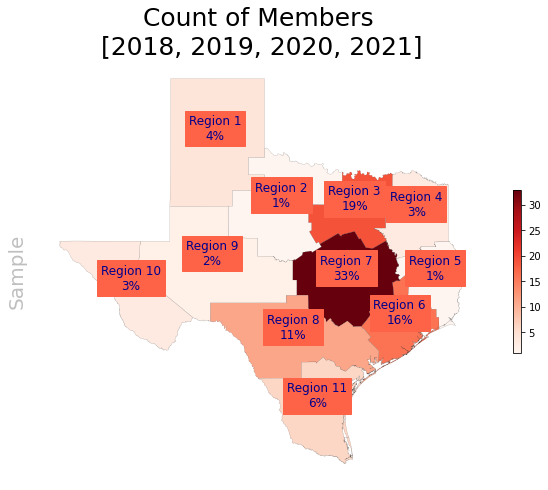

In [195]:


# set number of subplots' (columns, rows) enough to use
cols, rows = 2,2  #num of subplots <= (cols x rows)


    # join the geodataframe with the cleaned up csv dataframe and limit to the same year as the pop estimate
maps['Percentage'].fillna(0, inplace = True)
maps.reset_index(inplace = True)

    # set a variable that will call whatever column we want to visualise on the map
variable = 'Percentage'
    # set the range for the choropleth
vmin, vmax = min(maps['Percentage']), max(maps['Percentage'])
    # create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(10, 10))



    # add a title and annotation
ax.set_title('Count of Members \n'+ str(year), fontdict={'fontsize': '25', 'fontweight' : '3'})

    # add a watermark to the left side with a vertical orientation
ax.text(-0.05, 0.5, 'Sample', transform=ax.transAxes,
fontsize=20, color='gray', alpha=0.5,
ha='center', va='center', rotation='90')

maps.apply(lambda x: ax.annotate(
    text="Region " + str(x.RG_NB) + "\n" + str(x.Percentage) + "%", 
    xy=x.geometry.centroid.coords[0],
    ha='center',
    color = 'darkblue',
    fontsize=12,
    backgroundcolor = 'tomato',
    weight = 'ultralight',
    alpha = 1
),axis=1);

    # create map
maps.plot(column=variable, cmap='Reds', linewidth=0.1, ax=ax, edgecolor='0.1')
    # remove the axis
ax.axis('off')


    # Create colorbar as a legend
sm = plt.cm.ScalarMappable(cmap='Reds', norm=plt.Normalize(vmin=vmin, vmax=vmax))
        # empty array for the data range
sm._A = []
        # add the colorbar to the figure and make it smaller
cbar = fig.colorbar(sm, shrink = 0.3)

    ####
    # save the figure
fig.savefig("Chloropleth_total_committee_count.png", dpi=300)

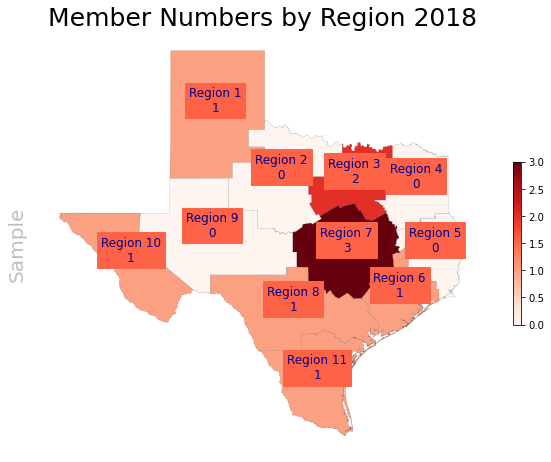

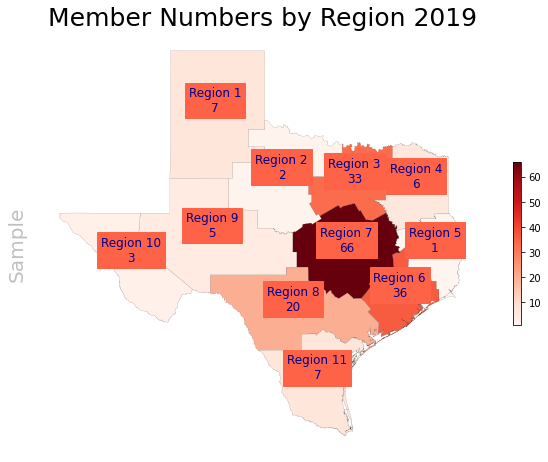

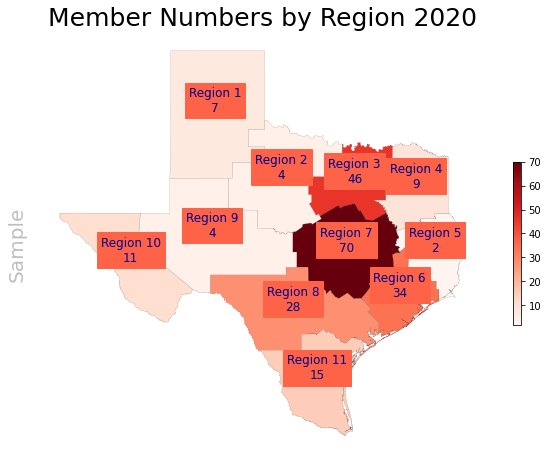

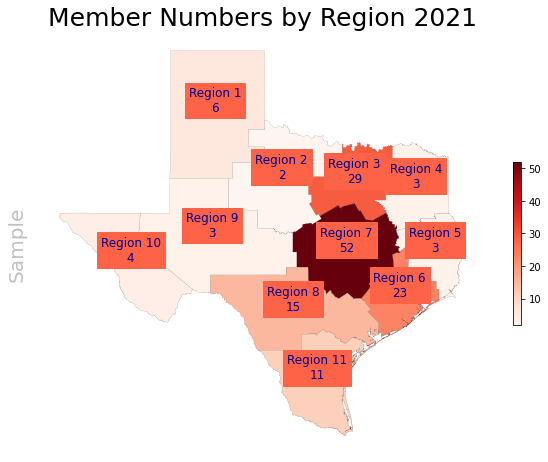

In [198]:
years = [2018, 2019, 2020, 2021]

for year in years: 
    data_for_map = df[(df['year'] == year)]
    data_for_map = data_for_map.groupby(['HHS Region']).agg({'name_abbrv': 'count'}).reset_index()


    merged = map_df.set_index('CNTY_NM').join(names.set_index('CNTY_NM')).join(pop.set_index('county'))
    mapped = merged.dissolve(by='RG_NB', aggfunc='sum')

    maps = mapped.join(data_for_map.set_index('HHS Region'))
    maps.reset_index(inplace = True)

# set number of subplots' (columns, rows) enough to use
    cols, rows = 2,2  #num of subplots <= (cols x rows)


    # join the geodataframe with the cleaned up csv dataframe and limit to the same year as the pop estimate
    maps['name_abbrv'].fillna(0, inplace = True)
    maps.reset_index(inplace = True)

    # set a variable that will call whatever column we want to visualise on the map
    variable = 'name_abbrv'
    # set the range for the choropleth
    vmin, vmax = min(maps['name_abbrv']), max(maps['name_abbrv'])
    # create figure and axes for Matplotlib
    fig, ax = plt.subplots(1, figsize=(10, 10))



    # add a title and annotation
    ax.set_title('Member Numbers by Region '+ str(year), fontdict={'fontsize': '25', 'fontweight' : '3'})

    # add a watermark to the left side with a vertical orientation
    ax.text(-0.05, 0.5, 'Sample', transform=ax.transAxes,
            fontsize=20, color='gray', alpha=0.5,
            ha='center', va='center', rotation='90')

    maps.apply(lambda x: ax.annotate(
        text="Region " + str(x.RG_NB) + "\n" + str(int(x.name_abbrv)), 
        xy=x.geometry.centroid.coords[0],
        ha='center',
        color = 'darkblue',
        fontsize=12,
        backgroundcolor = 'tomato',
        weight = 'ultralight',
        alpha = 1
    ),axis=1);

    # create map
    maps.plot(column=variable, cmap='Reds', linewidth=0.1, ax=ax, edgecolor='0.1')
    # remove the axis
    ax.axis('off')


    # Create colorbar as a legend
    sm = plt.cm.ScalarMappable(cmap='Reds', norm=plt.Normalize(vmin=vmin, vmax=vmax))
        # empty array for the data range
    sm._A = []
        # add the colorbar to the figure and make it smaller
    cbar = fig.colorbar(sm, shrink = 0.3)

    ####
    # save the figure
    fig.savefig("Chloropleth_all_members_"+str(year)+".png", dpi=300)

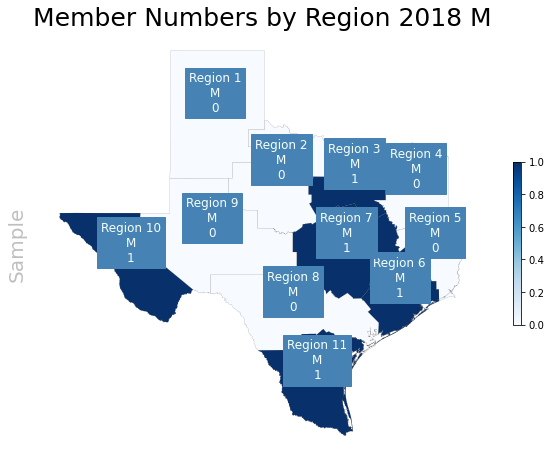

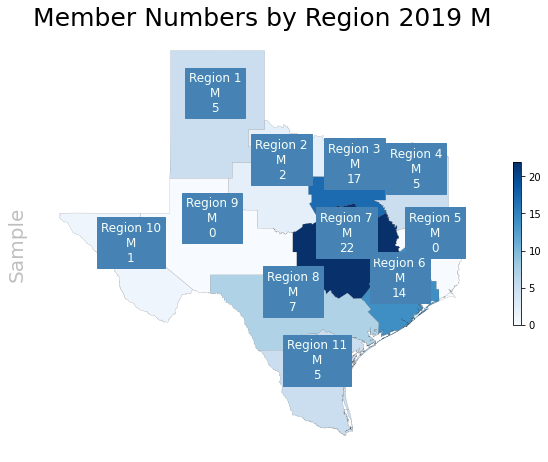

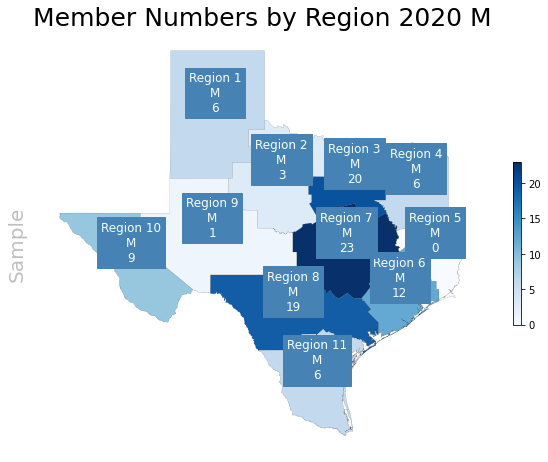

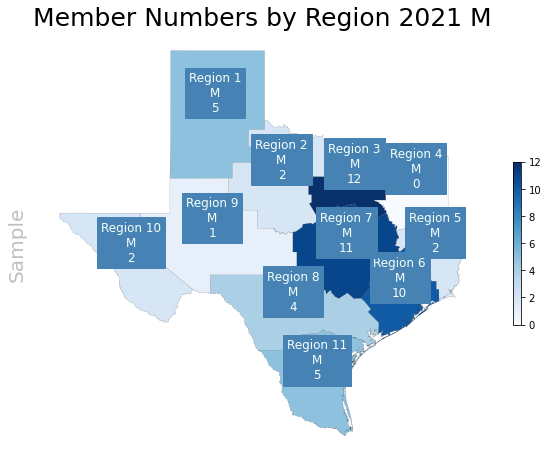

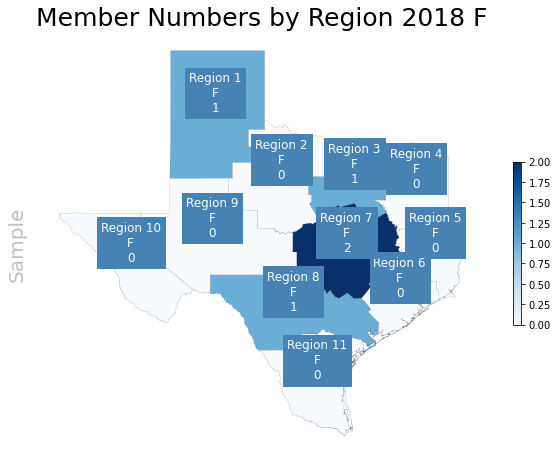

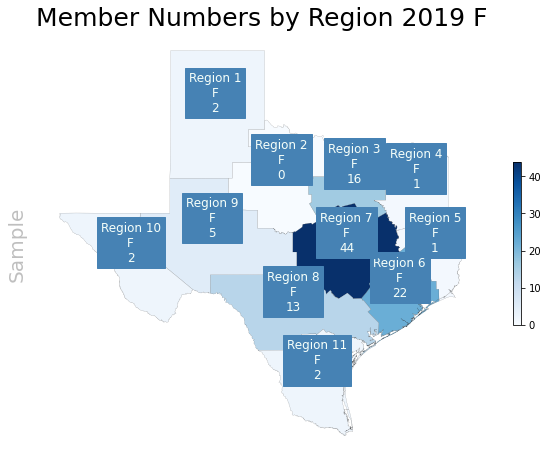

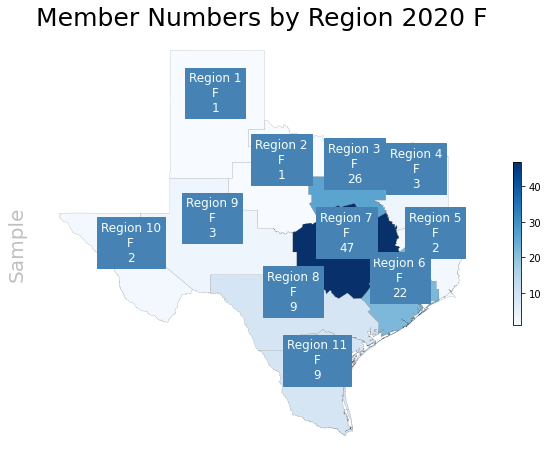

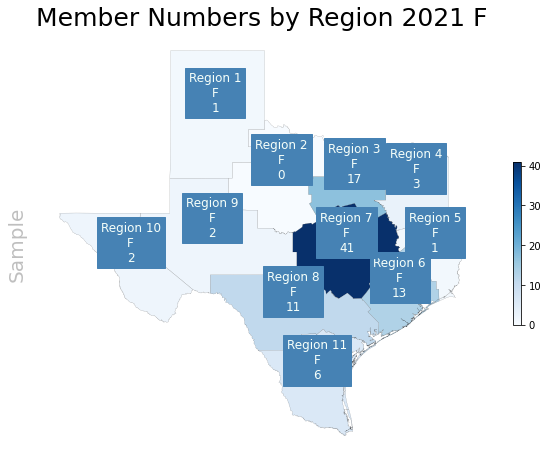

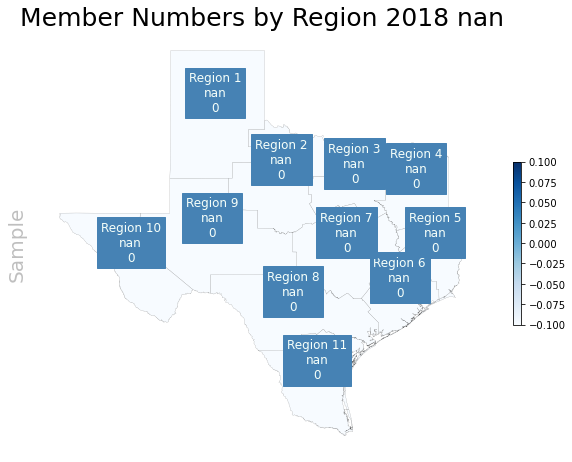

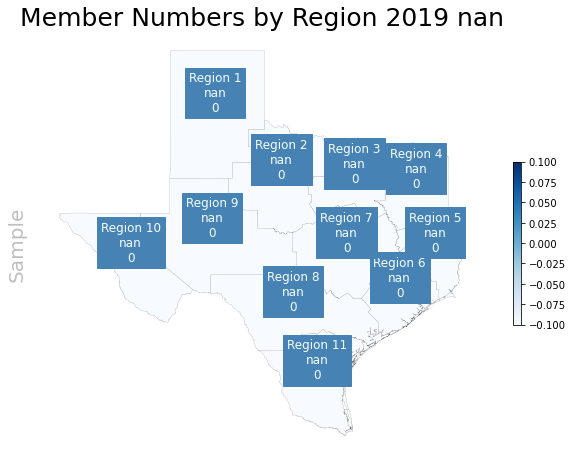

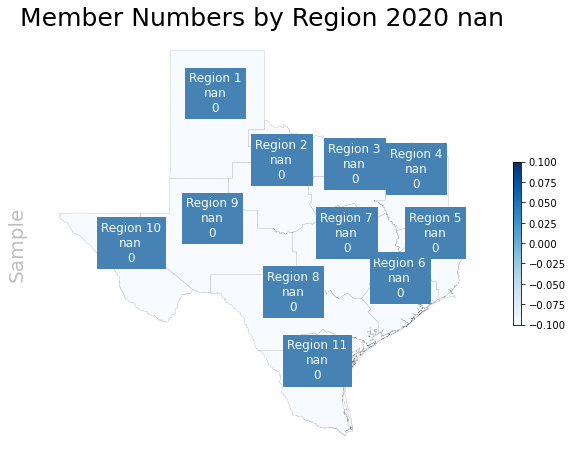

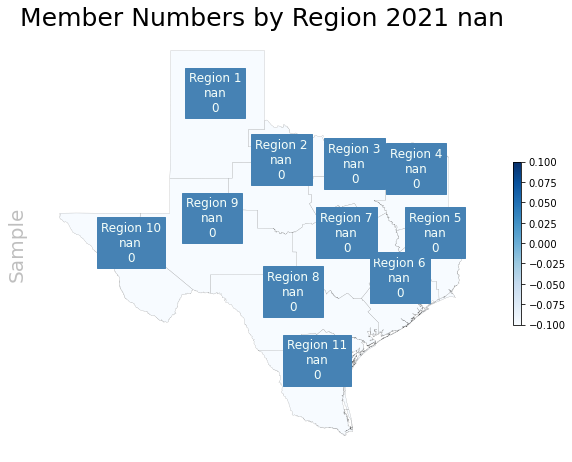

In [199]:
genders = df['Gender'].unique().tolist()

for gender in genders:
    for year in years: 
        data_for_map = df[(df['year'] == year)& (df['Gender'] == gender)]
        data_for_map = data_for_map.groupby(['HHS Region']).agg({'name_abbrv': 'count'}).reset_index()


        merged = map_df.set_index('CNTY_NM').join(names.set_index('CNTY_NM')).join(pop.set_index('county'))
        mapped = merged.dissolve(by='RG_NB', aggfunc='sum')

        maps = mapped.join(data_for_map.set_index('HHS Region'))
        maps.reset_index(inplace = True)

    # set number of subplots' (columns, rows) enough to use
        cols, rows = 2,2  #num of subplots <= (cols x rows)


        # join the geodataframe with the cleaned up csv dataframe and limit to the same year as the pop estimate
        maps['name_abbrv'].fillna(0, inplace = True)
        maps.reset_index(inplace = True)

        # set a variable that will call whatever column we want to visualise on the map
        variable = 'name_abbrv'
        # set the range for the choropleth
        vmin, vmax = min(maps['name_abbrv']), max(maps['name_abbrv'])
        # create figure and axes for Matplotlib
        fig, ax = plt.subplots(1, figsize=(10, 10))



        # add a title and annotation
        ax.set_title('Member Numbers by Region '+ str(year) +" "+ str(gender), fontdict={'fontsize': '25', 'fontweight' : '3'})

        # add a watermark to the left side with a vertical orientation
        ax.text(-0.05, 0.5, 'Sample', transform=ax.transAxes,
                fontsize=20, color='gray', alpha=0.5,
                ha='center', va='center', rotation='90')

        maps.apply(lambda x: ax.annotate(
            text="Region " + str(x.RG_NB) + "\n" + str(gender) +"\n" + str(int(x.name_abbrv)), 
            xy=x.geometry.centroid.coords[0],
            ha='center',
            color = 'mintcream',
            fontsize=12,
            backgroundcolor = 'steelblue',
            weight = 'ultralight',
            alpha = 1
        ),axis=1);

        # create map
        maps.plot(column=variable, cmap='Blues', linewidth=0.1, ax=ax, edgecolor='0.1')
        # remove the axis
        ax.axis('off')


        # Create colorbar as a legend
        sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=vmin, vmax=vmax))
            # empty array for the data range
        sm._A = []
            # add the colorbar to the figure and make it smaller
        cbar = fig.colorbar(sm, shrink = 0.3)

        ####
        # save the figure
        fig.savefig("Chloropleth_"+ str(gender) + "_"+str(year)+".png", dpi=300)